In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_filebase = 'bootstrap-output-test1b'

In [3]:
with open('%s.npy' % input_filebase,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    bootstrap_weights = np.load(f)

In [4]:
train_pts.shape

(100000, 2)

In [5]:
train_det_pts

array([[ 0.39013488,  2.65056086],
       [ 0.9036598 ,  0.91956245],
       [ 0.42644889,  1.35766071],
       ...,
       [-2.10158565,  5.8157137 ],
       [-0.96850872, -0.04008578],
       [ 1.5098503 , -0.67659905]])

In [6]:
true_det_pts

array([[ 0.48819728,  0.62984238],
       [-0.54296333,  4.20650107],
       [-1.47382645,  1.42721904],
       ...,
       [ 0.06113063,  3.24600645],
       [ 1.96456326, -0.90843271],
       [ 1.132528  ,  0.09859404]])

In [7]:
true_det_pts.shape

(10000, 2)

In [8]:
bootstrap_weights

array([[0.07861238, 0.12795757, 0.08191825, ..., 0.02706999, 0.1024921 ,
        0.12486709],
       [0.08653135, 0.12601443, 0.08605371, ..., 0.03294931, 0.09962975,
        0.13069938],
       [0.08095153, 0.12954304, 0.0831295 , ..., 0.02869027, 0.08845292,
        0.13174871],
       ...,
       [0.07892848, 0.14781836, 0.08111504, ..., 0.03369312, 0.1114796 ,
        0.14261661],
       [0.08155078, 0.13032903, 0.08369369, ..., 0.02565151, 0.10471409,
        0.12774353],
       [0.08183833, 0.13605663, 0.08456939, ..., 0.02789115, 0.10248567,
        0.13594753]])

In [9]:
bootstrap_weights.shape

(100, 100000)

In [10]:
ncalc = 100000
corr_array = np.zeros( ncalc )

point_index = 55

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


<function matplotlib.pyplot.show(close=None, block=None)>

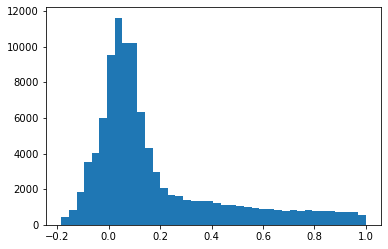

In [11]:
plt.hist( corr_array, bins=40)
plt.show

In [12]:
train_pts[point_index]

array([0.57226839, 1.72971604])

In [13]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

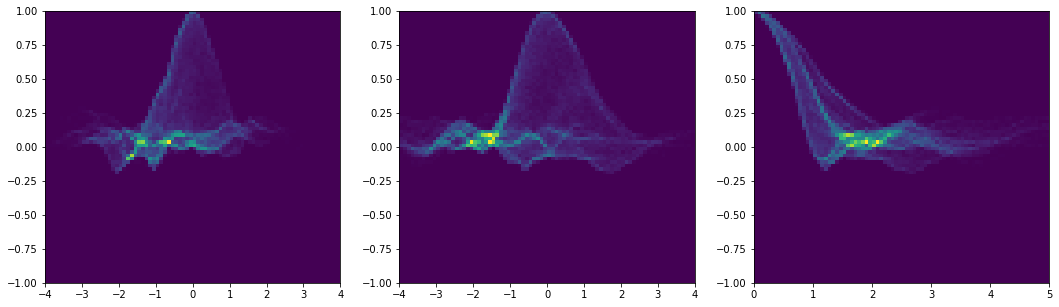

In [14]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr, corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [15]:
npoints = 3
ncalc = len(bootstrap_weights[0])


for point_index in range(npoints) :
    
    print(" Working on point %3d" % point_index)
    this_point_corr_array = np.zeros(ncalc)
    
    for i in range(ncalc) :
        pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
        this_point_corr_array[i] = pair_cor[0,1]
    
    if point_index == 0 :
        all_points_df0 = train_pts[:,0] - train_pts[point_index,0]
        all_points_df1 = train_pts[:,1] - train_pts[point_index,1]
        all_points_dr = np.sqrt( df0*df0 + df1*df1)
        all_points_corr_array = this_point_corr_array
    else :
        this_point_df0 = train_pts[:,0] - train_pts[point_index,0]
        this_point_df1 = train_pts[:,1] - train_pts[point_index,1]  
        this_point_dr = np.sqrt( this_point_df0*this_point_df0 + this_point_df1*this_point_df1 )
        all_points_df0 = np.append( all_points_df0, this_point_df0 )
        all_points_df1 = np.append( all_points_df1, this_point_df1 )
        all_points_dr = np.append( all_points_dr, this_point_dr )
        all_points_corr_array = np.append(all_points_corr_array, this_point_corr_array)


 Working on point   0
 Working on point   1
 Working on point   2


In [16]:
all_points_corr_array.shape

(300000,)

<function matplotlib.pyplot.show(close=None, block=None)>

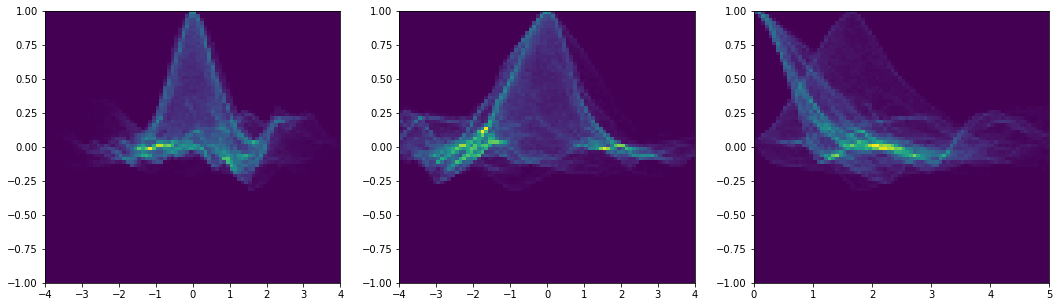

In [17]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( all_points_df1, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

## Rerun OmniFold for these samples

In [18]:
import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="1"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [19]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-27 14:42:16.473734: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:42:16.491111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:42:16.491355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:42:16.495018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:42:16.495209: I tensorflow/compiler/xla/stream_executo

In [20]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

In [21]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (100000, 2)
  shape of theta_unknown_S : (10000, 2)
  shape of xvals_1 :  (110000, 2)



  shape of labels0 : (100000,)
  shape of labels_unknown : (10000,)
  shape of yvals_1 :  (110000,)



  shape of theta0_G : (100000, 2)
  shape of xvals_2 :  (200000, 2)
  shape of yvals_2 :  (200000,)




ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-27 14:42:18.227481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 14:42:18.229772: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f9be54ff4f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 14:42:18.229783: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-27 14:42:18.233149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 14:42:18.321649: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 21ms/step - loss: 0.5543 - accuracy: 0.4575 - val_loss: 0.4398 - val_accuracy: 0.4533
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3892 - accuracy: 0.4550 - val_loss: 0.3569 - val_accuracy: 0.4533
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.4550 - val_loss: 0.3474 - val_accuracy: 0.4533
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3339 - accuracy: 0.4550 - val_loss: 0.3458 - val_accuracy: 0.4533
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.4550 - val_loss: 0.3365 - val_accuracy: 0.4533
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3215 - accuracy: 0.4550 - val_loss: 0.3301 - val_accuracy: 0.4533
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.4550 - val_loss: 0.3261 - val_accuracy: 0.4533
Epoch 8/20
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.1771 - val_loss: 0.1210 - val_accuracy: 0.1769
Epoch 19/20
9/9 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.1778 - val_loss: 0.1210 - val_accuracy: 0.1650
Epoch 20/20
10/10 [==============================] - 0s 654us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.2111 - accuracy: 0.2570 - val_loss: 0.1687 - val_accuracy: 0.2501
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1687 - accuracy: 0.2500 - val_loss: 0.1686 - val_accuracy: 0.2501
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1687 - accuracy: 0.2500 - val_loss: 0.1686 - val_accuracy: 0.2501
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.2500 - val_loss: 0.1686 - val_accuracy: 0.2501
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1686 

75/75 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.2495 - val_loss: 0.1646 - val_accuracy: 0.2515
Epoch 15/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.2495 - val_loss: 0.1646 - val_accuracy: 0.2515
Epoch 16/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.2495 - val_loss: 0.1646 - val_accuracy: 0.2515
Epoch 17/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.2495 - val_loss: 0.1646 - val_accuracy: 0.2515
Epoch 18/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.2495 - val_loss: 0.1646 - val_accuracy: 0.2515
Epoch 19/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.2495 - val_loss: 0.1646 - val_accuracy: 0.2515
Epoch 20/20
10/10 [==============================] - 0s 685us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
9/9 [==============================] - 1s 15ms

<function matplotlib.pyplot.show(close=None, block=None)>

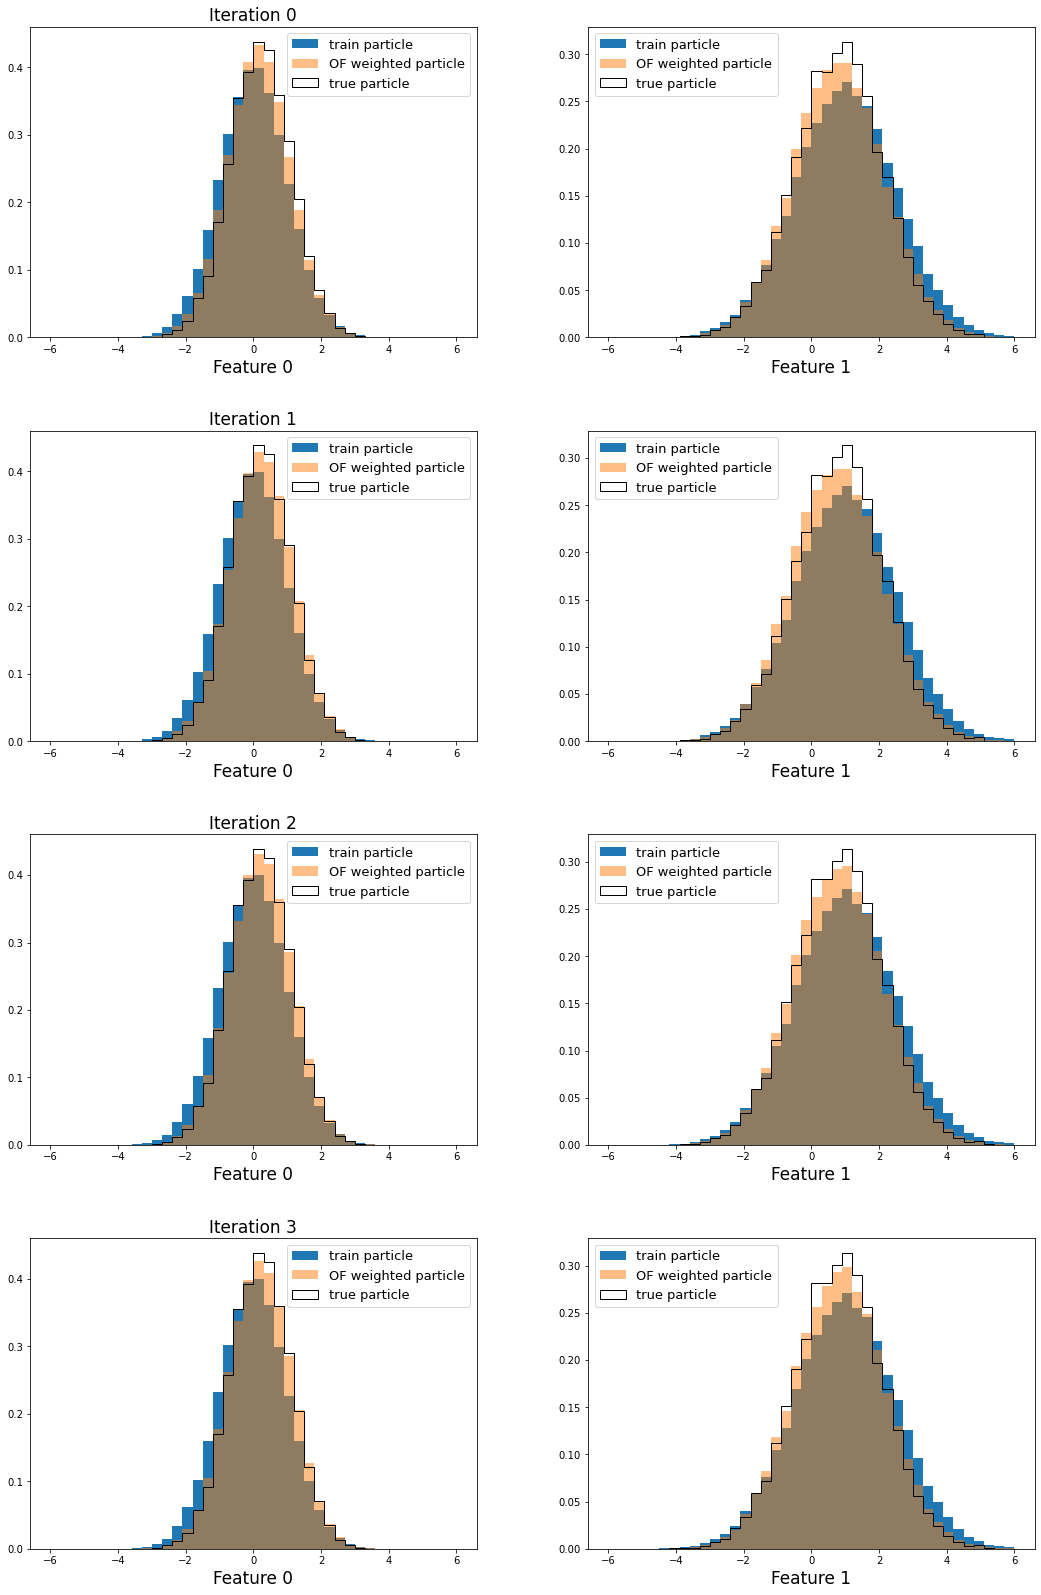

In [22]:

fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show